## Empirical dataset creation

In [30]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import pandas as pd
import numpy as np
from typing import List
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from utils import sort_transcript
from evaluation import evaluate_cycle_prediction
from transcript_sorting import sort_transcript, create_reduced_spacer_transcript, sort_transcript_reduced_spacers

In [5]:
train_dataset_path = r"C:\Users\Parv\Doc\HelixWorks\Basecalling\code\datasets\empirical\empirical_train_dataset_v6.pkl"
test_dataset_path = r"C:\Users\Parv\Doc\HelixWorks\Basecalling\code\datasets\empirical\full_empirical_test_dataset_v5_payload_seq.pkl"
motif_search_barcoded = r"C:\Users\Parv\Doc\HelixWorks\Basecalling\code\motifcaller\data\empirical\motif_search_barcoded.csv"

In [6]:
train_df = pd.read_pickle(train_dataset_path)

In [10]:
orientation_df = pd.read_csv(motif_search_barcoded)

In [11]:
cols_to_add = [col for col in orientation_df.columns if col not in train_df.columns or col == 'read_id']

In [12]:
merged_df = pd.merge(train_df, orientation_df[cols_to_add], on='read_id')

In [13]:
train_df

,ONT_Barcode,HW_Address,Payload,Library_Motifs,read_id,squiggle,Motifs,Spacer_Sequence,Payload_Sequence
0,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[3, 5], [1], [1], [4], [5], [], [], []]",0804c886-cd0a-4ece-87ee-adb529974699,"[0.7250000000000001, 0.7350000000000001, 0.752...","[1, 3, 5, 1, 1, 4, 5]","[11, 3, 11, 11, 5, 11, 12, 1, 12, 13, 1, 13, 1...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1..."
1,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[5], [1], [], [7], [7], [8], [], []]",0f041c54-7071-49d3-8ae2-7a1bf25525ab,"[0.525, 0.4845238095238096, 0.5035714285714287...","[5, 1, 1, 7, 7, 7, 8]","[11, 5, 11, 12, 1, 12, 14, 7, 14, 15, 7, 15, 1...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1..."
2,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[], [2], [], [4], [5], [6], [5], []]",1361a5db-d135-4e98-bb49-7a53c8d72991,"[0.6675799086757991, 0.5095890410958903, 0.515...","[1, 1, 2, 7, 4, 5, 6, 5]","[12, 2, 12, 14, 4, 14, 15, 5, 15, 16, 6, 16, 1...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1..."
3,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[4], [], [4], [6], [], [6], [], []]",1b4284d2-bee2-4a15-abab-aad861447308,"[0.6846153846153846, 0.5461538461538461, 0.549...","[1, 1, 1, 4, 4, 6, 6]","[11, 4, 11, 13, 4, 13, 14, 6, 14, 16, 6, 16]","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1..."
4,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[2], [2], [1], [4], [8], [3], [3], [5]]",1cc7b7bb-cd90-485f-b744-cf846d566675,"[0.7113163972286374, 0.6628175519630484, 0.662...","[1, 2, 2, 1, 4, 8, 3, 3, 5]","[11, 2, 11, 12, 2, 12, 13, 1, 13, 14, 4, 14, 1...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1..."
...,...,...,...,...,...,...,...,...,...
23934,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[], [4], [1], [8], [6], [], [6], [7]]",e1d6beff-c03a-4bab-bfa4-a4175da41be1,"[0.5864553314121037, 0.49279538904899134, 0.52...","[8, 4, 1, 8, 6, 6, 7]","[12, 4, 12, 13, 1, 13, 14, 8, 14, 15, 6, 15, 1...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1..."
23935,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[], [4], [2], [5], [1], [], [5], []]",ea27bf18-d3df-4b52-8f9e-98d23ce43b15,"[0.6136054421768707, 0.6054421768707482, 0.621...","[8, 8, 4, 2, 5, 1, 5]","[12, 4, 12, 13, 2, 13, 14, 5, 14, 15, 1, 15, 1...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1..."
23936,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[3], [2], [4], [5], [3], [], [], [2]]",f566dadf-dd54-4efe-8d04-94f6dededac8,"[0.7506172839506173, 0.5851851851851851, 0.612...","[8, 3, 2, 4, 5, 3, 2]","[11, 3, 11, 12, 2, 12, 13, 4, 13, 14, 5, 14, 1...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1..."
23937,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[4], [2], [4], [8], [], [1], [6], []]",f6e6ff66-98f2-4cca-9840-cedb55ee7f9d,"[0.6947115384615384, 0.7680288461538461, 0.728...","[8, 4, 2, 4, 8, 1, 6]","[11, 4, 11, 12, 2, 12, 13, 4, 13, 14, 8, 14, 1...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1..."


In [14]:
def get_df_for_barcode_address(df: pd.DataFrame, barcode: int, address: str) -> pd.DataFrame:
    return df.loc[
        (df['ONT_Barcode'] == barcode) & 
        (df['HW_Address'] == address) &
        (df['orientation'].str.startswith('+'))

    ]

def sort_sequences_by_length(spacer_sequences: List[str], read_ids: List[str]):

    sorted_indices = sorted(
        range(len(spacer_sequences)), key=lambda i: len(spacer_sequences[i]), reverse=True)
    
    return [spacer_sequences[ind] for ind in sorted_indices], [read_ids[ind] for ind in sorted_indices]
        

def get_longest_sequence(spacer_sequences: List[str], read_ids: List[str]):
    max_len = 0
    max_seq = 0
    read_id = ""
    for seq, r_id in zip(spacer_sequences, read_ids):
        if len(seq) > max_len:
            max_len = len(seq)
            max_seq = seq
            read_id = r_id

    return max_seq, read_id

In [15]:

seqs_arr = []
read_ids_arr = []

for barcode in tqdm(merged_df['ONT_Barcode'].unique()):
    for address in merged_df['HW_Address'].unique():
        selected_df = get_df_for_barcode_address(
            df=merged_df, barcode=barcode, address=address)
        
        #seq, read_id = get_longest_sequence(
        #    selected_df['Spacer_Sequence'], selected_df['read_id'])
        
        seqs, read_ids = sort_sequences_by_length(
            selected_df['Spacer_Sequence'].tolist(), selected_df['read_id'].tolist())

        
        seqs_arr.extend(seqs[:10])
        read_ids_arr.extend(read_ids[:10])


  0%|          | 0/16 [00:00<?, ?it/s]

In [26]:
def create_reduced_spacer_transcript(motif_seq: List[int]) -> List[int]:
    """ 12 4 12 12 3 12 -> 12 4 2 3 4 12 13 2 4 5 3 13"""

    seq = []
    str_seq = " ".join([str(i) for i in motif_seq])
    cycle_transcript = sort_transcript(str_seq)

    for ind, i in enumerate(cycle_transcript):
        if len(i) == 0:
            continue
        
        seq.append(ind + 11)
        seq.extend(list(set(i)))
        seq.append(ind + 11)

    return seq
    

In [29]:
for i in seqs_arr:
    sorted_transcript = sort_transcript(i)
    reduced_spacers_str = create_reduced_spacer_transcript(i)
    reduced_spacers_transcript = sort_transcript_reduced_spacers(reduced_spacers_str)

    print(sorted_transcript)
    print(reduced_spacers_transcript)
    print()
    

AttributeError: 'list' object has no attribute 'split'

(array([   9.,   13.,   34., 4810., 3574.,  977.,  332.,   20.,    9.,
           5.]),
 array([ 1. ,  2.3,  3.6,  4.9,  6.2,  7.5,  8.8, 10.1, 11.4, 12.7, 14. ]),
 <BarContainer object of 10 artists>)

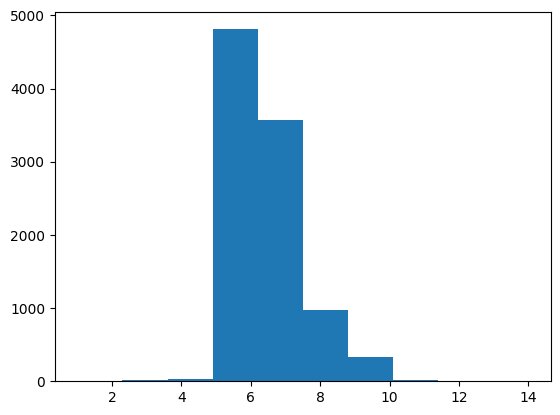

In [27]:
plt.hist([len(i)/3 for i in seqs_arr])

In [28]:
filtered_df = merged_df[merged_df['read_id'].isin(read_ids_arr)]

In [29]:
filtered_df = filtered_df.rename(columns={'Spacer_Sequence': 'motif_seq'})

In [30]:
filtered_df['motif_seq'] = filtered_df['motif_seq'].apply(create_reduced_spacer_transcript)

In [60]:
filtered_df.to_pickle(r"C:\Users\Parv\Doc\HelixWorks\Basecalling\code\motifcaller\data\empirical\pickled_datasets\cleaned_+_reduced_spacers_5_per_read.pkl")

In [7]:
filtered_df = pd.read_pickle(r"C:\Users\Parv\Doc\HelixWorks\Basecalling\code\motifcaller\data\empirical\pickled_datasets\cleaned_+_reduced_spacers_5_per_cycle.pkl")


filtered_df

,ONT_Barcode,HW_Address,Payload,Library_Motifs,read_id,squiggle,Motifs,motif_seq,Payload_Sequence,orientation,start_end,library_motif
0,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[3, 5], [1], [1], [4], [5], [], [], []]",0804c886-cd0a-4ece-87ee-adb529974699,"[0.7250000000000001, 0.7350000000000001, 0.752...","[1, 3, 5, 1, 1, 4, 5]","[11, 3, 5, 11, 12, 1, 1, 4, 5, 12, 13, 13, 14,...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1...",+|+|+|+|+|+|+,373-422|150-199|423-472|472-521|246-295|572-62...,ltm8_2x1|ltm8_3x3|ltm8_3x5|ltm8_4x1|ltm8_5x1|l...
4,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[2], [2], [1], [4], [8], [3], [3], [5]]",1cc7b7bb-cd90-485f-b744-cf846d566675,"[0.7113163972286374, 0.6628175519630484, 0.662...","[1, 2, 2, 1, 4, 8, 3, 3, 5]","[11, 2, 11, 12, 2, 1, 4, 8, 12, 13, 3, 3, 5, 1...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1...",+|+|+|+|+|+|+|+|+,116-165|215-264|265-314|315-364|365-414|415-46...,ltm8_1x1|ltm8_3x2|ltm8_4x2|ltm8_5x1|ltm8_6x4|l...
10,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[2], [7], [], [7], [5], [6], [5], [6]]",446f24b0-6392-4005-b9c6-5ef7c8cece73,"[0.5530460261262361, 0.5570748382370895, 0.555...","[2, 7, 7, 5, 6, 5, 6]","[11, 2, 11, 12, 7, 7, 5, 6, 12, 13, 5, 6, 13, ...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1...",+|+|+|+|+|+|+,194-243|244-293|339-388|389-438|439-488|489-53...,ltm8_3x2|ltm8_4x7|ltm8_6x7|ltm8_7x5|ltm8_8x6|l...
20,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[5], [1], [6], [4], [7], [6], [], [6]]",c4eb07e6-e34a-4321-9bbd-ee527f7667d1,"[0.5586619460383347, 0.5491392992308631, 0.549...","[5, 1, 6, 4, 7, 6, 6]","[11, 5, 11, 12, 1, 6, 4, 7, 12, 13, 6, 6, 13, ...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1...",+|+|+|+|+|+|+,222-271|272-321|322-371|372-421|422-471|472-52...,ltm8_3x5|ltm8_4x1|ltm8_5x6|ltm8_6x4|ltm8_7x7|l...
25,1,barcode_external01_internal01,"[[2, 3, 4, 5], [1, 2, 7, 8], [1, 4, 5, 6], [4,...","[[], [7], [5], [4], [2], [8], [5], [7]]",d88a8e63-4a68-4860-9956-82ed33189b49,"[0.7546511627906977, 0.6616279069767442, 0.653...","[1, 7, 5, 4, 2, 8, 5, 7]","[12, 7, 12, 13, 5, 4, 2, 8, 13, 14, 5, 7, 14, ...","[11, 2, 11, 11, 3, 11, 11, 4, 11, 11, 5, 11, 1...",+|+|+|+|+|+|+|+,136-185|235-284|285-334|335-384|385-434|435-48...,ltm8_2x1|ltm8_4x7|ltm8_5x5|ltm8_6x4|ltm8_7x2|l...
...,...,...,...,...,...,...,...,...,...,...,...,...
23365,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[4], [2], [4], [5], [1], [6], [], [6]]",0026d597-729a-4fb2-a978-7c138843520e,"[0.5597104945717732, 0.5536791314837153, 0.556...","[8, 4, 2, 4, 5, 1, 6, 6]","[11, 4, 11, 12, 2, 4, 5, 1, 12, 13, 6, 6, 13, ...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1...",+|+|+|+|+|+|+|+,95-144|194-243|244-293|294-343|344-393|480-529...,ltm8_1x8|ltm8_3x4|ltm8_4x2|ltm8_5x4|ltm8_6x5|l...
23370,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[4], [3], [8, 2], [3], [1], [1], [6], []]",1f0df33c-3b0b-449b-b6da-ef44dc8f80d4,"[0.5419058553386912, 0.5430539609644087, 0.570...","[8, 4, 3, 2, 8, 3, 1, 1, 6]","[11, 4, 11, 12, 3, 8, 2, 3, 12, 13, 1, 1, 6, 1...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1...",+|+|+|+|+|+|+|+|+,164-213|214-263|264-313|512-561|314-363|562-61...,ltm8_2x8|ltm8_3x4|ltm8_4x3|ltm8_5x2|ltm8_5x8|l...
23372,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 8], [3,...","[[5], [], [4], [3], [5], [3], [6], [7]]",4405c997-6cca-43da-9533-f9bbf1fd46a1,"[0.42028985507246375, 0.4182194616977226, 0.45...","[8, 8, 5, 4, 3, 5, 3, 6, 7]","[11, 5, 11, 12, 4, 3, 5, 3, 12, 13, 6, 7, 13, ...","[11, 3, 11, 11, 4, 11, 11, 5, 11, 11, 7, 11, 1...",+|+|+|+|+|+|+|+|+,100-149|150-199|200-249|299-348|349-398|399-44...,ltm8_1x8|ltm8_2x8|ltm8_3x5|ltm8_5x4|ltm8_6x3|l...
23373,73,barcode_external08_internal08,"[[3, 4, 5, 7], [2, 3, 4, 5], [1, 2, 4, 

In [36]:
for i in filtered_df['motif_seq']:
    print(i)
    t = sort_transcript_reduced_spacers(" ".join([str(k) for k in i]))
    print(t)
    t = [list(set(f)) for f in t]
    print(t)
    print()

[11, 3, 5, 11, 12, 1, 1, 4, 5, 12, 13, 13, 14, 14, 15, 5, 15]
[[3, 5], [1, 1, 4, 5], [], [], [5], [], [], []]
[[3, 5], [1, 4, 5], [], [], [5], [], [], []]

[11, 2, 11, 12, 2, 1, 4, 8, 12, 13, 3, 3, 5, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 5, 18]
[[2], [2, 1, 4, 8], [3, 3, 5], [], [], [], [], [5]]
[[2], [8, 1, 2, 4], [3, 5], [], [], [], [], [5]]

[13, 5, 13, 14, 6, 2, 3, 3, 14, 15, 7, 15, 16, 16, 17, 17, 18, 7, 18]
[[], [], [5], [6, 2, 3, 3], [7], [], [], [7]]
[[], [], [5], [2, 3, 6], [7], [], [], [7]]

[11, 4, 11, 12, 8, 2, 5, 1, 12, 13, 5, 13, 14, 14, 15, 15, 16, 16, 17, 1, 5, 17]
[[4], [8, 2, 5, 1], [5], [], [], [], [1, 5], []]
[[4], [8, 1, 2, 5], [5], [], [], [], [1, 5], []]

[11, 2, 11, 12, 7, 7, 5, 6, 12, 13, 5, 6, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 6, 18]
[[2], [7, 7, 5, 6], [5, 6], [], [], [], [], [6]]
[[2], [5, 6, 7], [5, 6], [], [], [], [], [6]]

[11, 5, 11, 12, 1, 6, 7, 1, 12, 13, 6, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 6, 18]
[[5], [1, 6, 7, 1], [6], [], [], [], []